#### IMPORTING THE NECESSARY LIBRARIES

In [29]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm, t
from scipy.stats import binom
import seaborn as sns
import pylab
from pylab import legend,plot,show,title,xlabel,ylabel
from numpy import random
import scipy
from scipy import stats
from scipy.stats import t, norm
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
from statsmodels.stats import proportion
from statsmodels.stats import proportion as ssp
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

#### PREVIOUS_APPLICATION.CSV

#### LOADING THE DATASETS

In [30]:
df1=pd.read_csv(r"G:\downloads\previous_application.csv")

#### INFORMATION ABOUT THE DATASET

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### CHECKING FOR MISSING VALUES

In [32]:
df1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [33]:
df1.columns.tolist()

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

#### Dropping the unwanted columns from the dataset

In [34]:
columns_to_drop=[
 'AMT_DOWN_PAYMENT',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'DAYS_DECISION',
 'NAME_TYPE_SUITE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

df1=df1.drop(columns_to_drop,axis=1)

In [35]:
df1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,Cash through the bank,XAP,Repeater,middle
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,XNA,XAP,Repeater,low_action
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,Cash through the bank,XAP,Repeater,high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,Cash through the bank,XAP,Repeater,middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,Cash through the bank,HC,Repeater,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,XAP,Approved,Cash through the bank,XAP,Refreshed,low_normal
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,XAP,Approved,Cash through the bank,XAP,New,middle
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,XAP,Approved,Cash through the bank,XAP,Repeater,low_normal
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,XNA,Approved,Cash through the bank,XAP,Repeater,low_normal


In [36]:
df1.shape

(1670214, 13)

In [37]:
df1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE           385515
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_YIELD_GROUP               0
dtype: int64

#### Filling missing values

<Axes: xlabel='AMT_ANNUITY'>

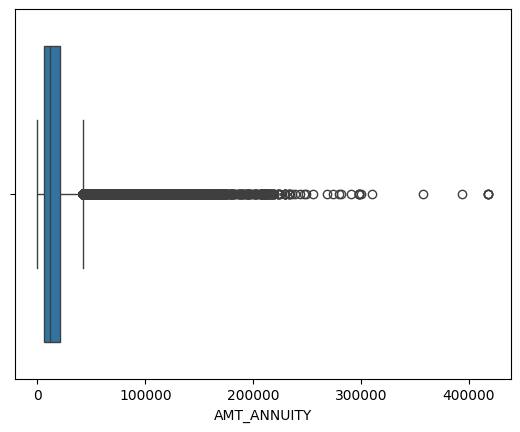

In [40]:
sns.boxplot(x='AMT_ANNUITY', data=df1)

##### Since AMT_ANNUITY column is having an outlier which is very large it will be inappropriate to fill those missing values with mean. 
##### Hence Median comes to rescue for this and we will fill those missing blanks with median value.

In [44]:
values=df1['AMT_ANNUITY'].median()
df1.loc[df1['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

<Axes: ylabel='AMT_GOODS_PRICE'>

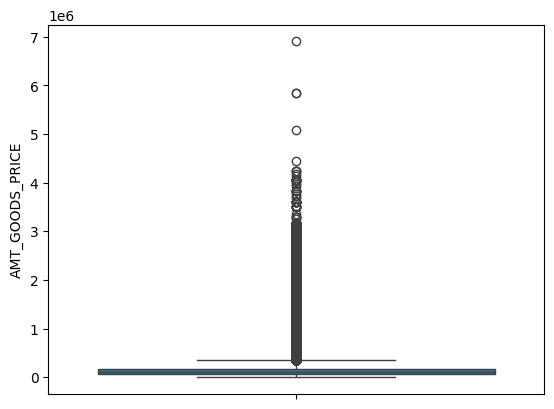

In [52]:
sns.boxplot(y='AMT_GOODS_PRICE', data=df1)

In [47]:
values=df1['AMT_GOODS_PRICE'].median()
df1.loc[df1['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=values

In [48]:
df1.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
AMT_ANNUITY               0
AMT_APPLICATION           0
AMT_CREDIT                1
AMT_GOODS_PRICE           0
NAME_CASH_LOAN_PURPOSE    0
NAME_CONTRACT_STATUS      0
NAME_PAYMENT_TYPE         0
CODE_REJECT_REASON        0
NAME_CLIENT_TYPE          0
NAME_YIELD_GROUP          0
dtype: int64

## APPLICATION_DATA.CSV

#### LOADING THE DATA

In [3]:
df2=pd.read_csv(r"G:\downloads\application_data.csv")

In [7]:
df2.shape

(307511, 122)

In [8]:
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [24]:
df2.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

#### REMOVING THE UNWANTED COLUMNS

In [26]:
columns_to_drop = [
     "DAYS_BIRTH", 
    "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "FLAG_MOBIL", 
    "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", 
     "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", 
    "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", 
    "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", 
     "APARTMENTS_AVG", 
    "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BUILD_AVG", "COMMONAREA_AVG", 
    "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG", 
    "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", 
    "NONLIVINGAREA_AVG", "APARTMENTS_MODE", "BASEMENTAREA_MODE", 
    "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BUILD_MODE", "COMMONAREA_MODE", 
    "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMAX_MODE", "FLOORSMIN_MODE", 
    "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE", 
    "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE", "APARTMENTS_MEDI", 
    "BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BUILD_MEDI", 
    "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI", "FLOORSMAX_MEDI", 
    "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", 
    "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "FONDKAPREMONT_MODE", 
    "HOUSETYPE_MODE", "TOTALAREA_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE", 
    "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", 
    "DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2", 
    "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", 
    "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", 
    "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", 
    "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", 
    "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"
]
df2=df2.drop(columns_to_drop,axis=1)

In [38]:
df2.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
OWN_CAR_AGE                    202929
OCCUPATION_TYPE                 96391
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
ORGANIZATION_TYPE                   0
EXT_SOURCE_1                   173378
EXT_SOURCE_2                      660
EXT_SOURCE_3                    60965
AMT_REQ_CRED

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Filling missing values

##### Since AMT_ANNUITY column is having an outlier which is very large it will be inappropriate to fill those missing values with mean. 
##### Hence Median comes to rescue for this and we will fill those missing blanks with median value.

In [53]:
df2['AMT_ANNUITY']=df2['AMT_ANNUITY'].fillna(df2.AMT_ANNUITY.median())

In [54]:
df2['AMT_ANNUITY'].isnull().sum()

np.int64(0)

In [55]:
df2['AMT_GOODS_PRICE']=df2['AMT_GOODS_PRICE'].fillna(df2.AMT_GOODS_PRICE.median())

In [56]:
df2['AMT_GOODS_PRICE'].isnull().sum()

np.int64(0)

In [57]:
df2['OWN_CAR_AGE']=df2['OWN_CAR_AGE'].fillna(df2.OWN_CAR_AGE.median())

In [58]:
df2['OWN_CAR_AGE'].isnull().sum()

np.int64(0)

In [59]:
df2['EXT_SOURCE_1']=df2['EXT_SOURCE_1'].fillna(df2.EXT_SOURCE_1.median())

In [60]:
df2['EXT_SOURCE_1'].isnull().sum()

np.int64(0)

In [61]:
df2['EXT_SOURCE_2']=df2['EXT_SOURCE_2'].fillna(df2.EXT_SOURCE_2.median())

In [62]:
df2['EXT_SOURCE_2'].isnull().sum()

np.int64(0)

In [63]:
df2['EXT_SOURCE_3']=df2['EXT_SOURCE_3'].fillna(df2.EXT_SOURCE_3.median())

In [64]:
df2['EXT_SOURCE_3'].isnull().sum()

np.int64(0)

In [65]:
df2['AMT_REQ_CREDIT_BUREAU_HOUR']=df2['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df2.AMT_REQ_CREDIT_BUREAU_HOUR.median())

In [66]:
df2['AMT_REQ_CREDIT_BUREAU_DAY']=df2['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df2.AMT_REQ_CREDIT_BUREAU_DAY.median())

In [67]:
df2['AMT_REQ_CREDIT_BUREAU_WEEK']=df2['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df2.AMT_REQ_CREDIT_BUREAU_WEEK.median())

In [68]:
df2['AMT_REQ_CREDIT_BUREAU_MON']=df2['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df2.AMT_REQ_CREDIT_BUREAU_MON.median())

In [69]:
df2['AMT_REQ_CREDIT_BUREAU_QRT']=df2['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df2.AMT_REQ_CREDIT_BUREAU_QRT.median())

In [70]:
df2['AMT_REQ_CREDIT_BUREAU_YEAR']=df2['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df2.AMT_REQ_CREDIT_BUREAU_YEAR.median())

In [80]:
df2=df2.drop('NAME_TYPE_SUITE',axis=1)

In [88]:
df2.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [93]:
df2.iloc[np.where(df2['OCCUPATION_TYPE'].isnull())]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,XNA,0.587334,0.205747,0.751724,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,XNA,0.722044,0.555183,0.652897,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,XNA,0.505998,0.624305,0.669057,0.0,0.0,0.0,0.0,0.0,3.0
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,...,Military,0.600396,0.685011,0.524496,0.0,0.0,0.0,1.0,0.0,1.0
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,...,Business Entity Type 3,0.505998,0.479987,0.410103,0.0,0.0,0.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307486,456230,0,Cash loans,F,Y,Y,1,292500.000,355536.0,18283.5,...,Business Entity Type 2,0.505998,0.661025,0.199771,0.0,0.0,0.0,0.0,1.0,1.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,XNA,0.505998,0.307082,0.255332,0.0,0.0,0.0,0.0,1.0,8.0
307500,456244,0,Cash loans,F,N,Y,0,261000.000,1303812.0,35982.0,...,Business Entity Type 3,0.896042,0.789389,0.337673,0.0,0.0,0.0,1.0,0.0,5.0
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,XNA,0.505998,0.346391,0.742182,0.0,0.0,0.0,2.0,0.0,0.0


#### Using random.choice to fill the missing values by picking random options from the existing data. This method helps keep the missing values similar to the original data and avoids making one category too common or biased.

In [100]:
occupation_types = df2['OCCUPATION_TYPE'].dropna().unique()

In [102]:
random_values = np.random.choice(occupation_types, size=df2['OCCUPATION_TYPE'].isnull().sum())
random_values

array(['Cooking staff', 'Realty agents', 'Private service staff', ...,
       'Low-skill Laborers', 'High skill tech staff', 'Cooking staff'],
      dtype=object)

In [103]:
df2.loc[df2['OCCUPATION_TYPE'].isnull(), 'OCCUPATION_TYPE'] = random_values

In [104]:
df2['OCCUPATION_TYPE'].isnull().sum()

np.int64(0)

In [105]:
df2.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 60517
Sales staff              37493
Core staff               32842
Managers                 26705
Drivers                  23967
High skill tech staff    16744
Accountants              15244
Medicine staff           13976
Security staff           12064
Cooking staff            11280
Cleaning staff            9959
Private service staff     7980
Low-skill Laborers        7361
Waiters/barmen staff      6679
Secretaries               6628
Realty agents             6147
HR staff                  6004
IT staff                  5921
Name: count, dtype: int64

# MERGING THE DATASETS

In [193]:
# client having records of previous loan history

newjoin = pd.merge(df1, df2, on='SK_ID_CURR', how='inner')
newjoin

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,...,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,Cash through the bank,...,Military,0.505998,0.683797,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,XNA,...,Self-employed,0.505998,0.663524,0.535276,0.0,0.0,0.0,0.0,0.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,Cash through the bank,...,Postal,0.505998,0.250565,0.535276,0.0,0.0,0.0,0.0,0.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,Cash through the bank,...,XNA,0.505998,0.663817,0.535276,0.0,0.0,0.0,0.0,0.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,Cash through the bank,...,Security Ministries,0.349146,0.560157,0.363945,0.0,0.0,0.0,1.0,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,1662353,443544,Cash loans,12607.875,112500.0,112500.0,112500.0,XNA,Refused,Cash through the bank,...,Government,0.505998,0.670397,0.163426,0.0,0.0,0.0,1.0,0.0,6.0
1413697,1556789,209732,Cash loans,22299.390,315000.0,436216.5,315000.0,XNA,Approved,Cash through the bank,...,Business Entity Type 3,0.505998,0.764216,0.331251,0.0,0.0,0.0,0.0,0.0,1.0
1413698,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,XAP,Approved,Cash through the bank,...,Trade: type 7,0.505998,0.656552,0.621226,0.0,0.0,0.0,0.0,0.0,2.0
1413699,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,XNA,Approved,Cash through the bank,...,XNA,0.505998,0.507868,0.535276,0.0,0.0,0.0,0.0,0.0,5.0


In [213]:
newjoin.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE_x', 'AMT_ANNUITY_x',
       'AMT_APPLICATION', 'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_YIELD_GROUP', 'TARGET',
       'NAME_CONTRACT_TYPE_y', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_y',
       'AMT_ANNUITY_y', 'AMT_GOODS_PRICE_y', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_

#### ELIMINATING THE OUTLIERS FROM THE MERGED DATASET

In [195]:
numerical_column = newjoin.select_dtypes(include=[np.number]).columns #Identify numerical columns

upper_fence = {}
for column in numerical_column:
  if column!='TARGET':
       Q1 = newjoin[column].quantile(0.25)  # First quartile (25th percentile)
       Q3 = newjoin[column].quantile(0.75)  # Third quartile (75th percentile)
       IQR = Q3 - Q1  # Interquartile range
       upper_fence[column] = Q3 + 1.5 * IQR    # Calculate upper fence for each numerical column
  else:
      continue

print("Upper fences for numerical columns:")
print(upper_fence) # Print the upper fences for reference

for column, fence in upper_fence.items():  
    newjoin = newjoin[newjoin[column] <= fence]  # Remove rows where any numerical column exceeds its upper fence

print("\nFiltered DataFrame:")
print(newjoin) # Display the filtered DataFrame

Upper fences for numerical columns:
{'SK_ID_PREV': np.float64(3768011.0), 'SK_ID_CURR': np.float64(634844.0), 'AMT_ANNUITY_x': np.float64(30760.83), 'AMT_APPLICATION': np.float64(420374.25), 'AMT_CREDIT_x': np.float64(501779.25), 'AMT_GOODS_PRICE_x': np.float64(350437.5), 'CNT_CHILDREN': np.float64(2.5), 'AMT_INCOME_TOTAL': np.float64(348750.0), 'AMT_CREDIT_y': np.float64(1614960.0), 'AMT_ANNUITY_y': np.float64(61123.5), 'AMT_GOODS_PRICE_y': np.float64(1341000.0), 'REGION_POPULATION_RELATIVE': np.float64(0.05660950000000001), 'OWN_CAR_AGE': np.float64(9.0), 'CNT_FAM_MEMBERS': np.float64(4.5), 'REGION_RATING_CLIENT': np.float64(2.0), 'REGION_RATING_CLIENT_W_CITY': np.float64(2.0), 'EXT_SOURCE_1': np.float64(0.5059979305057544), 'EXT_SOURCE_2': np.float64(1.06733247934454), 'EXT_SOURCE_3': np.float64(0.981866321183295), 'AMT_REQ_CREDIT_BUREAU_HOUR': np.float64(0.0), 'AMT_REQ_CREDIT_BUREAU_DAY': np.float64(0.0), 'AMT_REQ_CREDIT_BUREAU_WEEK': np.float64(0.0), 'AMT_REQ_CREDIT_BUREAU_MON': n

In [196]:
newjoin.TARGET.value_counts()

TARGET
0    342437
1     36147
Name: count, dtype: int64

#### SPLITTING THE COLUMNS BASED ON NUMERICAL AND CATEGORICAL VALUES

In [154]:
#numerical_columns = inner_join.select_dtypes(include=['float64', 'int64']).columns
#numerical_columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY_x', 'AMT_APPLICATION',
       'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x', 'TARGET', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT_y', 'AMT_ANNUITY_y',
       'AMT_GOODS_PRICE_y', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [156]:
#categorical_columns = inner_join.select_dtypes(include=['object']).columns
#categorical_columns

Index(['NAME_CONTRACT_TYPE_x', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_YIELD_GROUP', 'NAME_CONTRACT_TYPE_y',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

### UNIVARIATE ANALYSIS

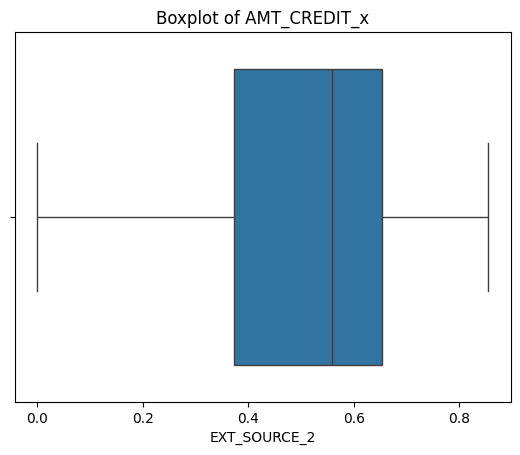

In [209]:
import seaborn as sns
sns.boxplot(x=newjoin['EXT_SOURCE_2'])
plt.title('Boxplot of AMT_CREDIT_x')
plt.show()


Analysis for NAME_CONTRACT_TYPE_x:


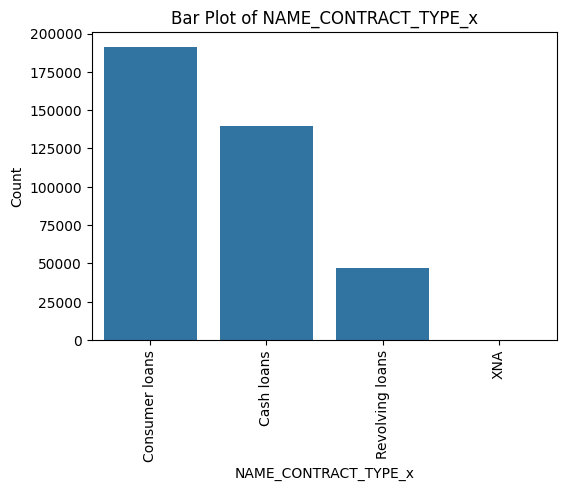

Analysis for AMT_ANNUITY_x:
Summary statistics:
count    378584.000000
mean      10385.661505
std        5419.469488
min           0.000000
25%        6325.335000
50%       11250.000000
75%       11674.530000
max       30760.650000
Name: AMT_ANNUITY_x, dtype: float64



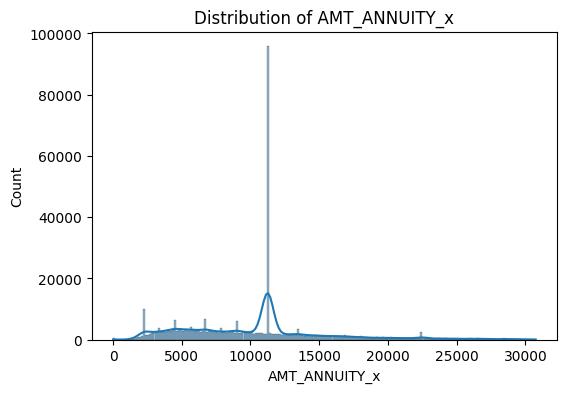

Analysis for AMT_APPLICATION:
Summary statistics:
count    378584.00000
mean      77146.12950
std       78668.90396
min           0.00000
25%           0.00000
50%       52605.00000
75%      117562.50000
max      405000.00000
Name: AMT_APPLICATION, dtype: float64



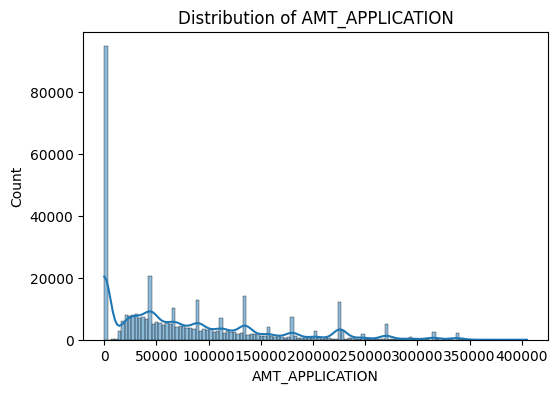

Analysis for AMT_CREDIT_x:
Summary statistics:
count    378584.000000
mean      88222.075376
std       91778.667008
min           0.000000
25%       20070.000000
50%       58450.500000
75%      134316.000000
max      499099.500000
Name: AMT_CREDIT_x, dtype: float64



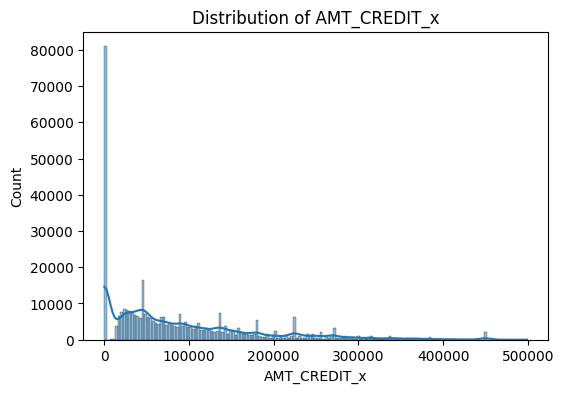

Analysis for AMT_GOODS_PRICE_x:
Summary statistics:
count    378584.000000
mean     104666.755623
std       65383.039386
min           0.000000
25%       51470.662500
50%      112320.000000
75%      117554.625000
max      350131.500000
Name: AMT_GOODS_PRICE_x, dtype: float64



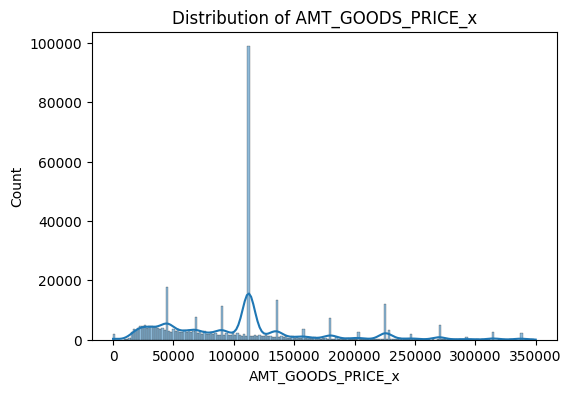

Analysis for NAME_CASH_LOAN_PURPOSE:


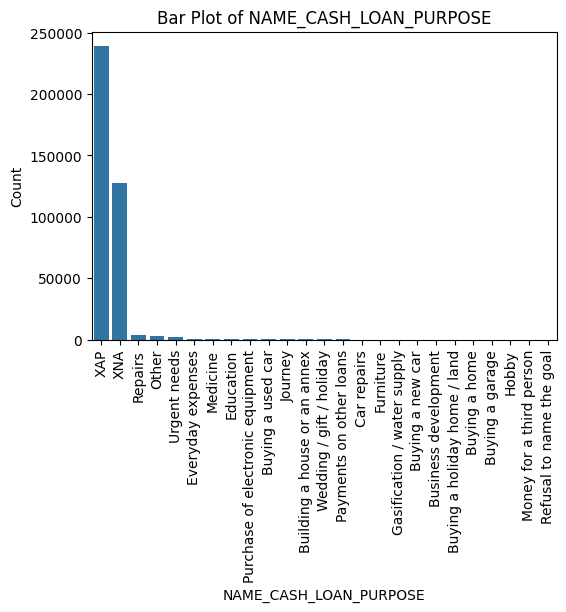

Analysis for NAME_CONTRACT_STATUS:


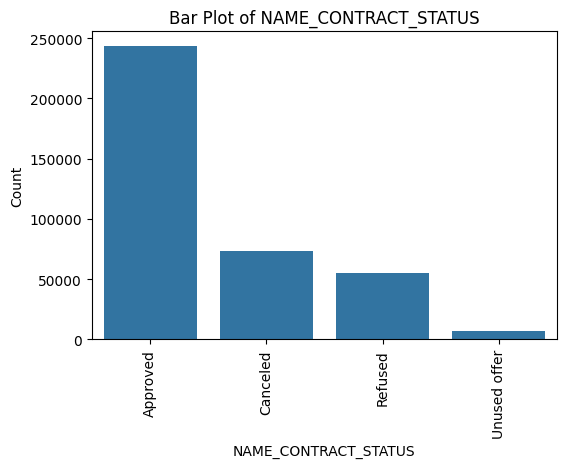

Analysis for NAME_PAYMENT_TYPE:


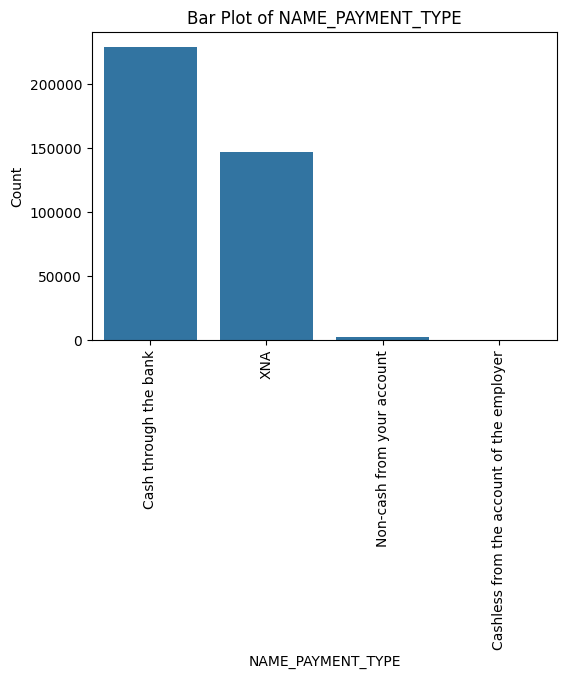

Analysis for CODE_REJECT_REASON:


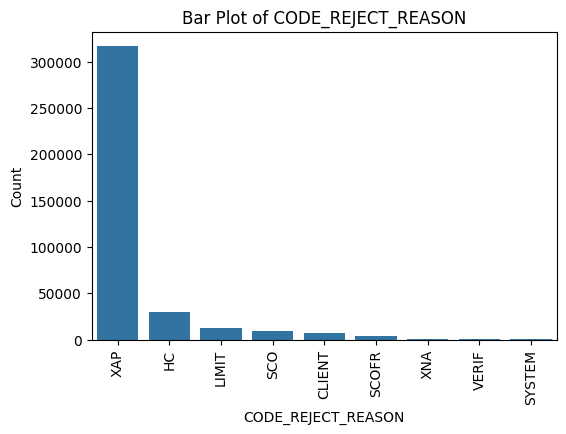

Analysis for NAME_CLIENT_TYPE:


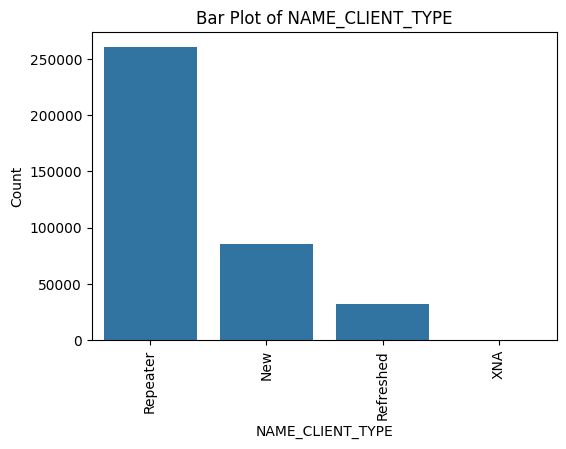

Analysis for NAME_YIELD_GROUP:


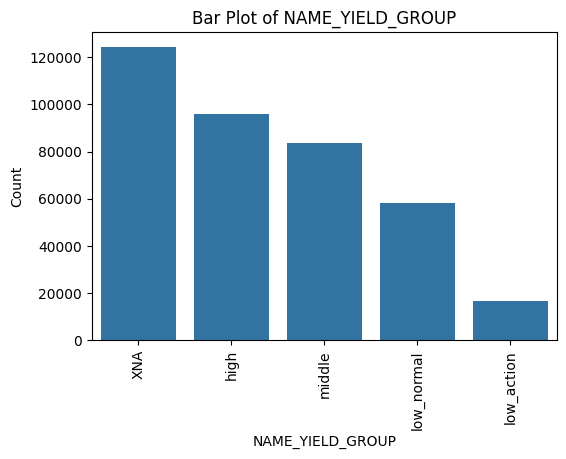

Analysis for NAME_CONTRACT_TYPE_y:


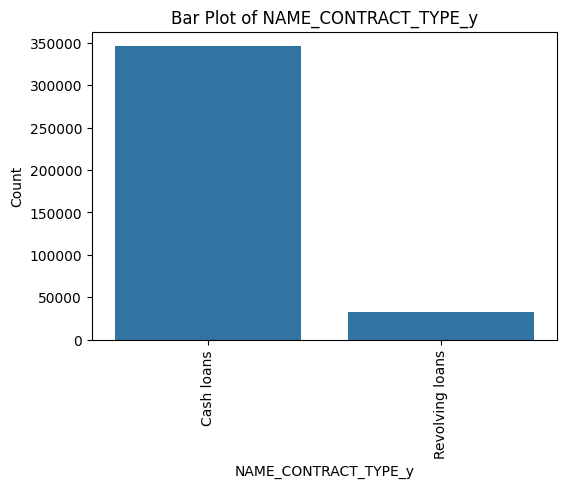

Analysis for CODE_GENDER:


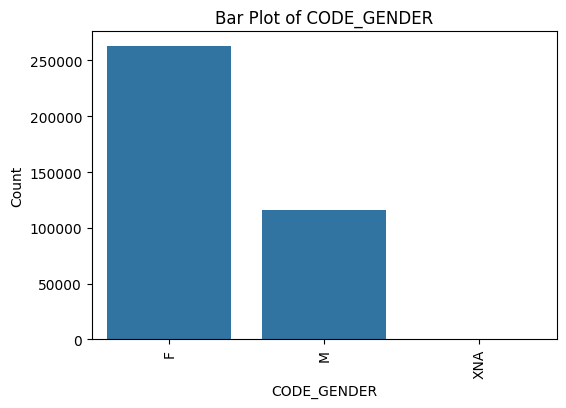

Analysis for FLAG_OWN_CAR:


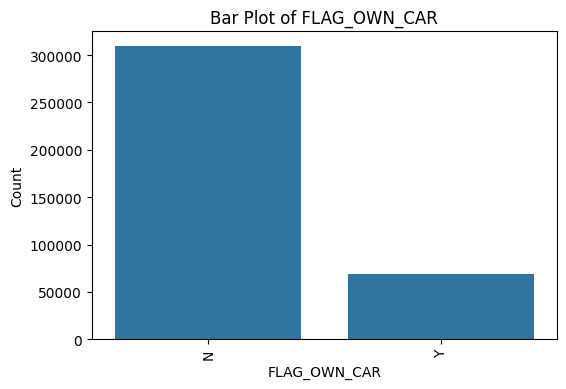

Analysis for FLAG_OWN_REALTY:


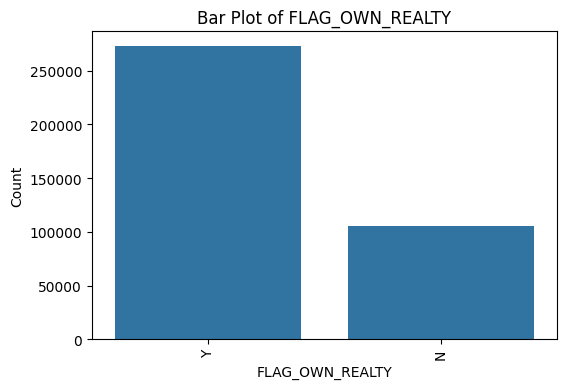

Analysis for CNT_CHILDREN:
Summary statistics:
count    378584.000000
mean          0.348684
std           0.624183
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.000000
Name: CNT_CHILDREN, dtype: float64



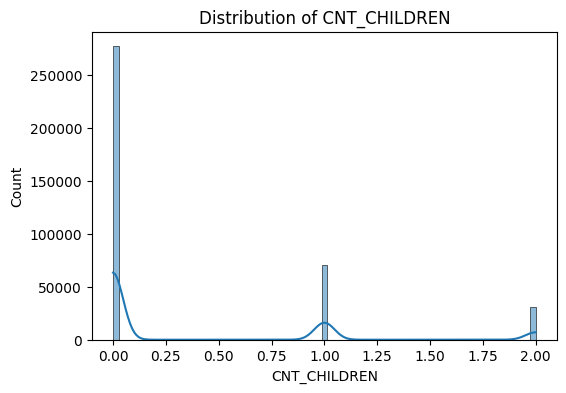

Analysis for AMT_INCOME_TOTAL:
Summary statistics:
count    378584.000000
mean     148248.575359
std       60613.424017
min       25650.000000
25%      108000.000000
50%      135000.000000
75%      180000.000000
max      346500.000000
Name: AMT_INCOME_TOTAL, dtype: float64



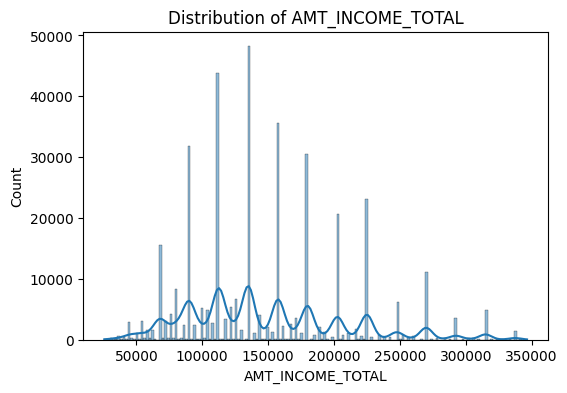

Analysis for AMT_CREDIT_y:
Summary statistics:
count    3.785840e+05
mean     4.952886e+05
std      3.055971e+05
min      4.500000e+04
25%      2.547000e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.609272e+06
Name: AMT_CREDIT_y, dtype: float64



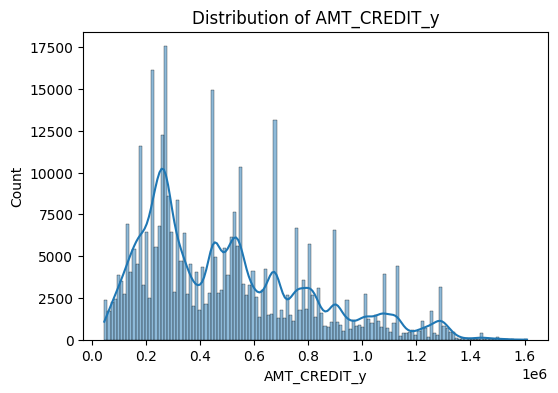

Analysis for AMT_ANNUITY_y:
Summary statistics:
count    378584.000000
mean      23616.284858
std       10947.905364
min        1993.500000
25%       15115.500000
50%       22455.000000
75%       30393.000000
max       61123.500000
Name: AMT_ANNUITY_y, dtype: float64



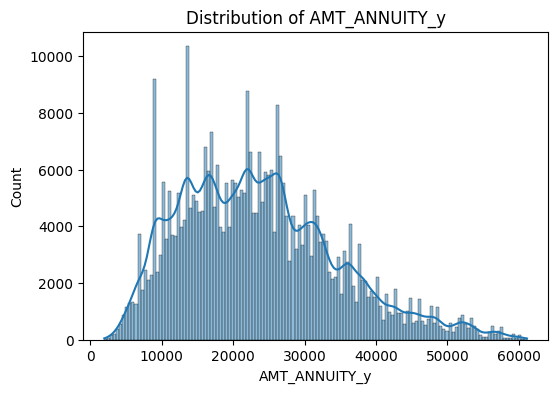

Analysis for AMT_GOODS_PRICE_y:
Summary statistics:
count    3.785840e+05
mean     4.424000e+05
std      2.743457e+05
min      4.500000e+04
25%      2.250000e+05
50%      4.050000e+05
75%      6.525000e+05
max      1.341000e+06
Name: AMT_GOODS_PRICE_y, dtype: float64



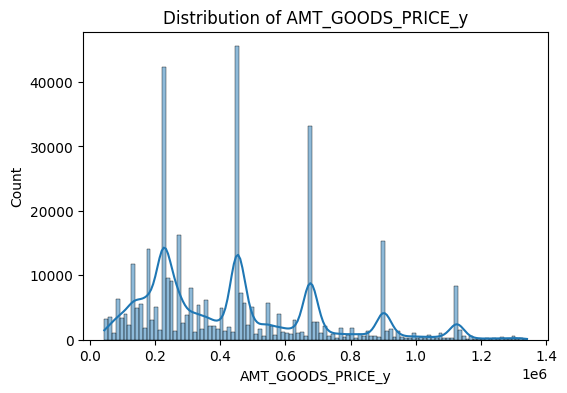

Analysis for NAME_INCOME_TYPE:


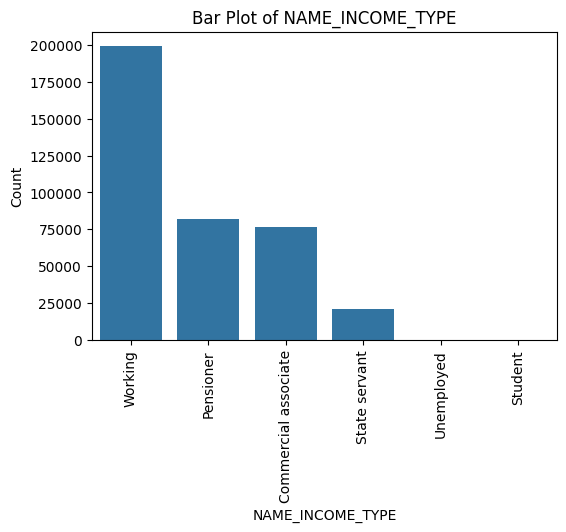

Analysis for NAME_EDUCATION_TYPE:


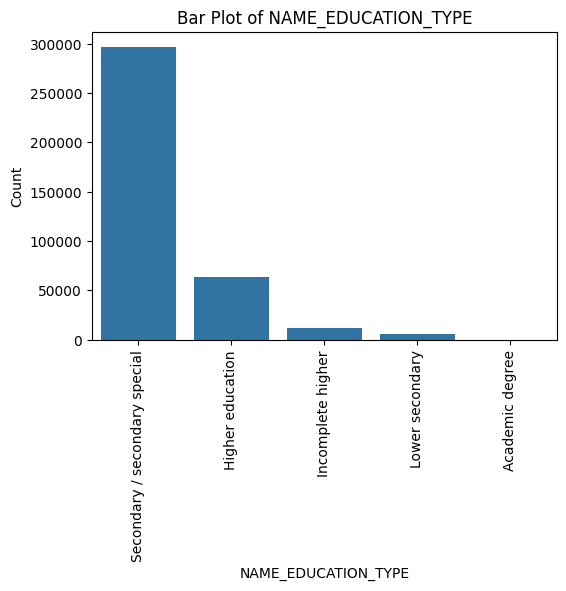

Analysis for NAME_FAMILY_STATUS:


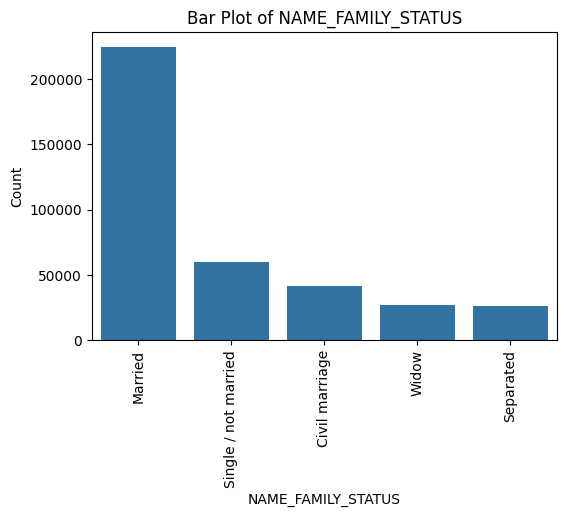

Analysis for NAME_HOUSING_TYPE:


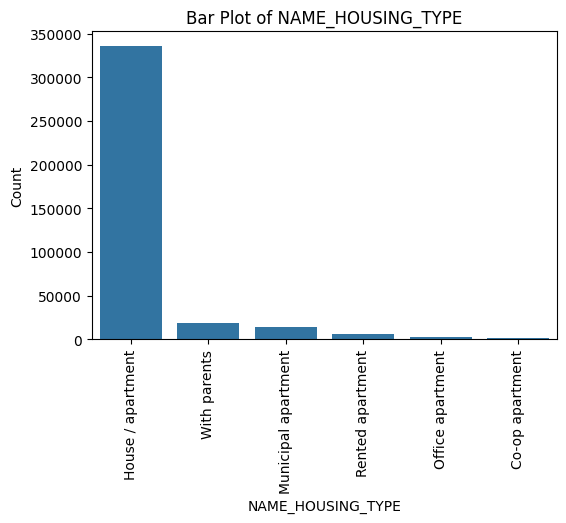

Analysis for REGION_POPULATION_RELATIVE:
Summary statistics:
count    378584.000000
mean          0.020029
std           0.010648
min           0.001276
25%           0.010032
50%           0.019101
75%           0.028663
max           0.046220
Name: REGION_POPULATION_RELATIVE, dtype: float64



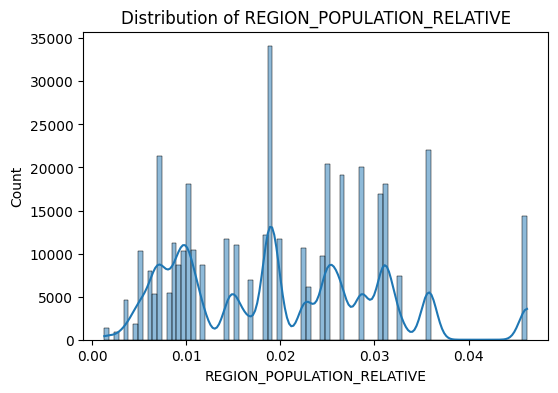

Analysis for OWN_CAR_AGE:
Summary statistics:
count    378584.000000
mean          8.261696
std           1.950995
min           0.000000
25%           9.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: OWN_CAR_AGE, dtype: float64



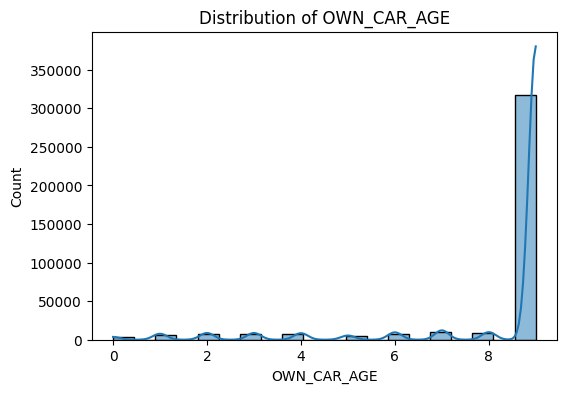

Analysis for OCCUPATION_TYPE:


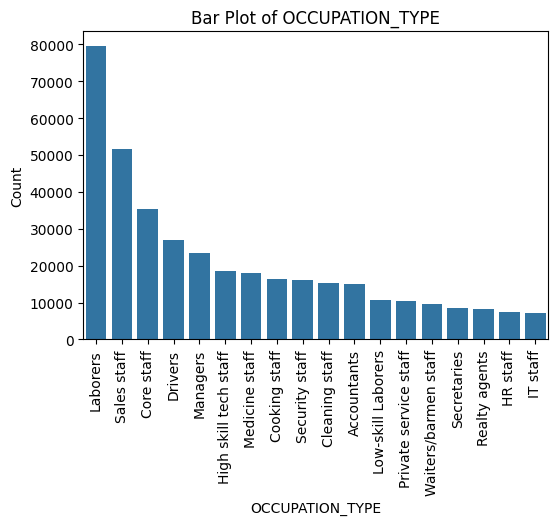

Analysis for CNT_FAM_MEMBERS:
Summary statistics:
count    378584.000000
mean          2.051893
std           0.837677
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: CNT_FAM_MEMBERS, dtype: float64



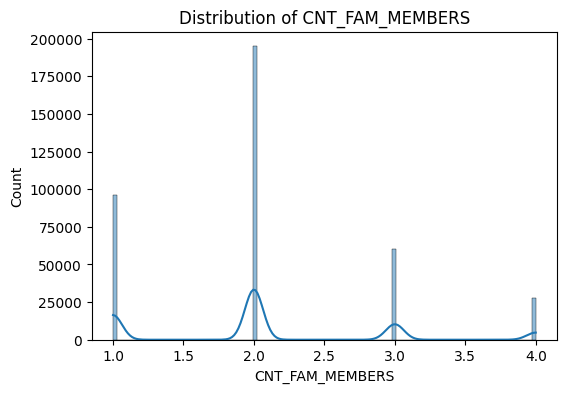

Analysis for REGION_RATING_CLIENT:
Summary statistics:
count    378584.000000
mean          1.929992
std           0.255161
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: REGION_RATING_CLIENT, dtype: float64



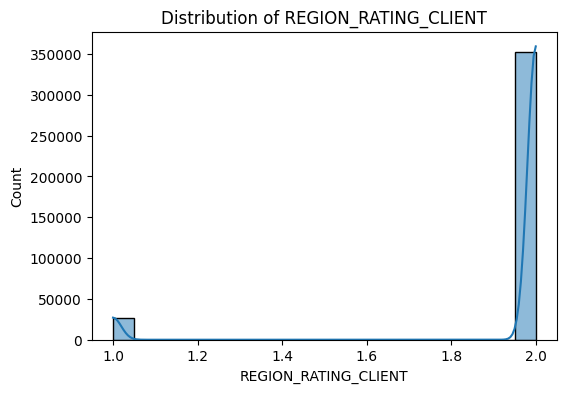

Analysis for ORGANIZATION_TYPE:


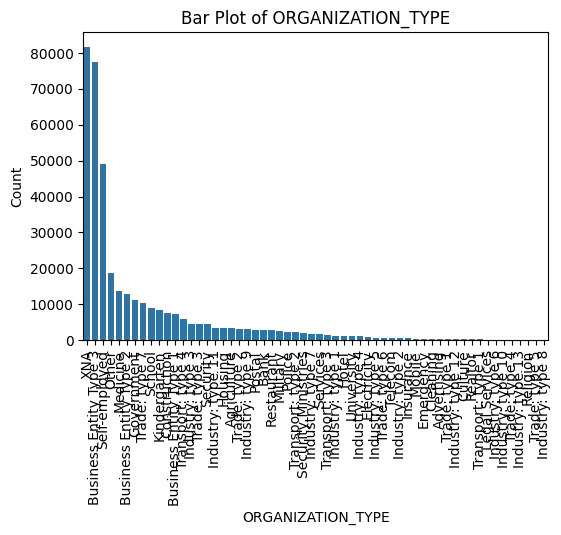

Analysis for EXT_SOURCE_1:
Summary statistics:
count    378584.000000
mean          0.459480
std           0.098710
min           0.015600
25%           0.499316
50%           0.505998
75%           0.505998
max           0.505998
Name: EXT_SOURCE_1, dtype: float64



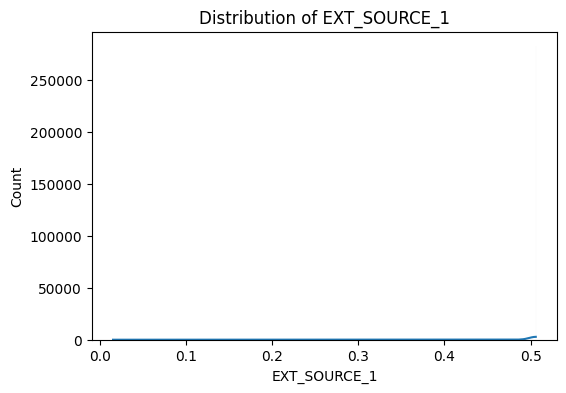

Analysis for EXT_SOURCE_2:
Summary statistics:
count    3.785840e+05
mean     5.046930e-01
std      1.904159e-01
min      8.173617e-08
25%      3.736136e-01
50%      5.582592e-01
75%      6.540971e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64



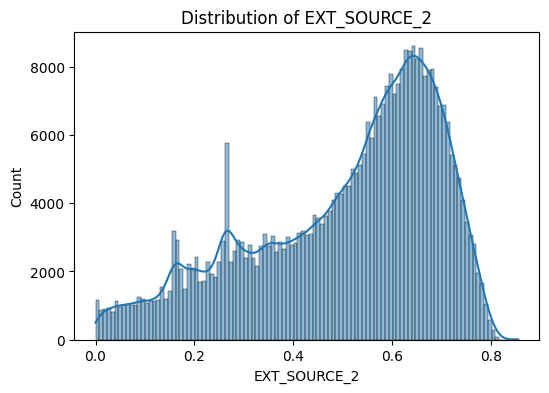

Analysis for EXT_SOURCE_3:
Summary statistics:
count    378584.000000
mean          0.505385
std           0.174863
min           0.000527
25%           0.408359
50%           0.535276
75%           0.614414
max           0.893976
Name: EXT_SOURCE_3, dtype: float64



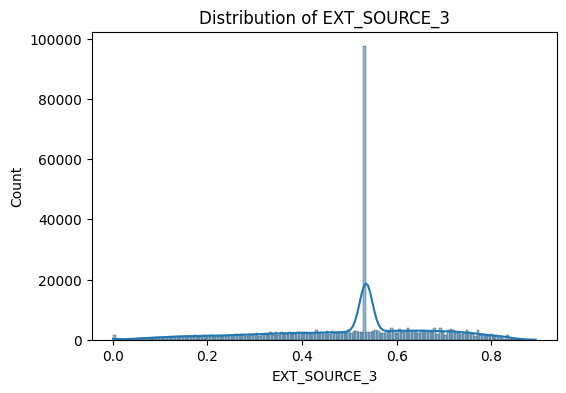

In [245]:
import matplotlib.pyplot as plt
list_no_graph=['SK_ID_CURR','TARGET','REGION_RATING_CLIENT_W_CITY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','SK_ID_PREV','']
# Loop through each column
for column in newjoin.columns:
    if column not in list_no_graph:
    # Check the data type of the column
      if newjoin[column].dtype == 'object':  # Categorical column
        print(f"Analysis for {column}:")
        # Bar plot for categorical data using seaborn
        plt.figure(figsize=(6, 4))
        sns.barplot(x=newjoin[column].value_counts().index, y=newjoin[column].value_counts().values)
        plt.xticks(rotation=90)
        plt.title(f"Bar Plot of {column}")
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()
    
      else:  # Numerical column
         print(f"Analysis for {column}:")
         print("Summary statistics:")
         print(newjoin[column].describe())  # Summary statistics (mean, std, min, etc.)
         print()
        
        # Histogram with KDE (Kernel Density Estimate) for numerical data
         plt.figure(figsize=(6, 4))
         sns.histplot(newjoin[column], kde=True)
         plt.title(f"Distribution of {column}")
         plt.show()

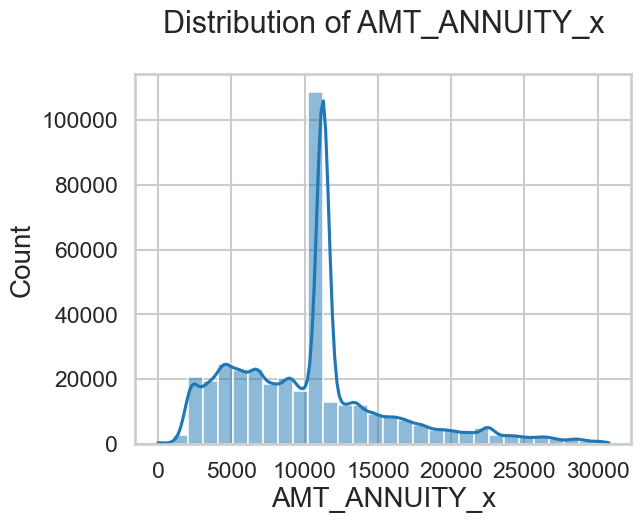

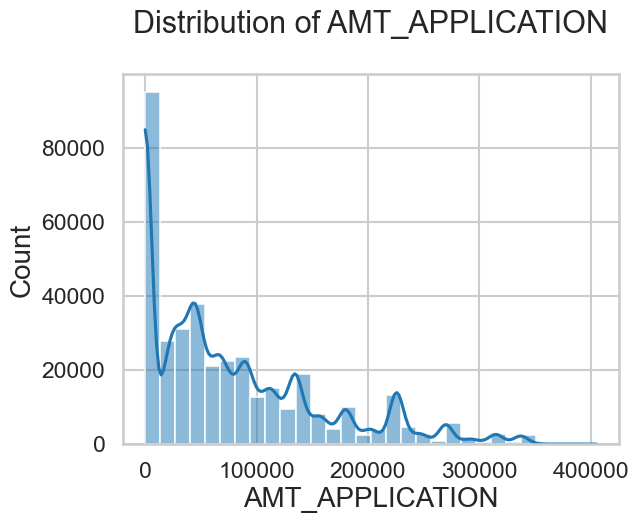

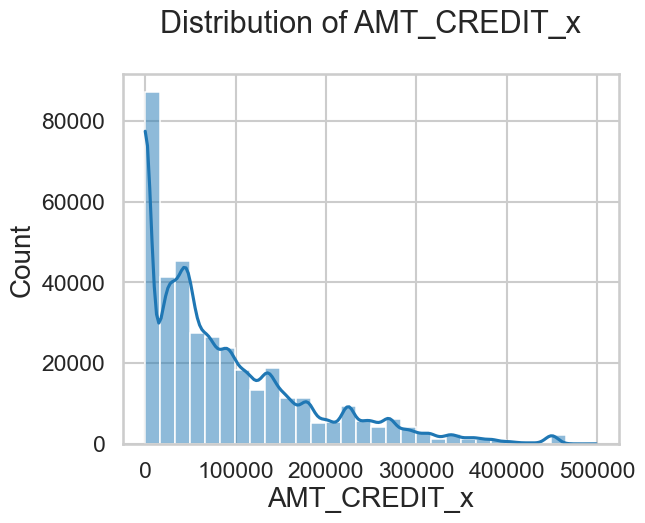

In [297]:
numerical_cols = ['AMT_ANNUITY_x', 'AMT_APPLICATION', 'AMT_CREDIT_x']
for col in numerical_cols:
    sns.histplot(newjoin[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# BIVARIATE ANALYSIS

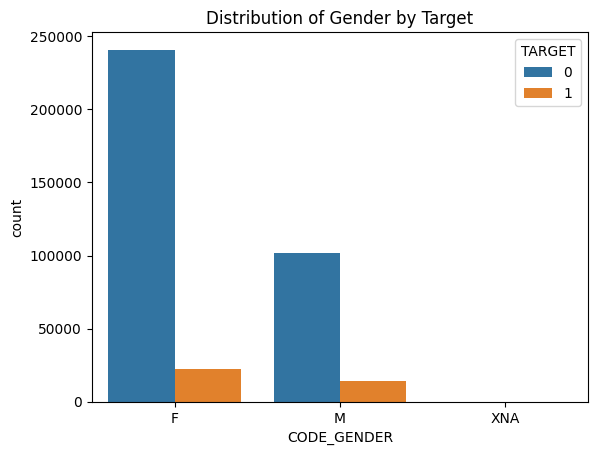

In [197]:
#1. Categorical vs. Categorical

#Relationship between 'CODE_GENDER' and 'TARGET'
sns.countplot(data=newjoin, x='CODE_GENDER', hue='TARGET')
plt.title('Distribution of Gender by Target')
plt.show()

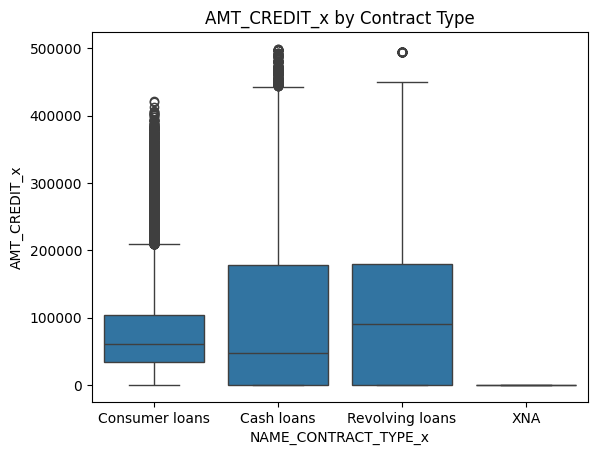

In [217]:
#2. Categorical vs. Continuous

# Relationship between 'NAME_CONTRACT_TYPE_x' and 'AMT_CREDIT_x'
sns.boxplot(data=newjoin, x='NAME_CONTRACT_TYPE_x', y='AMT_CREDIT_x')
plt.title('AMT_CREDIT_x by Contract Type')
plt.show()

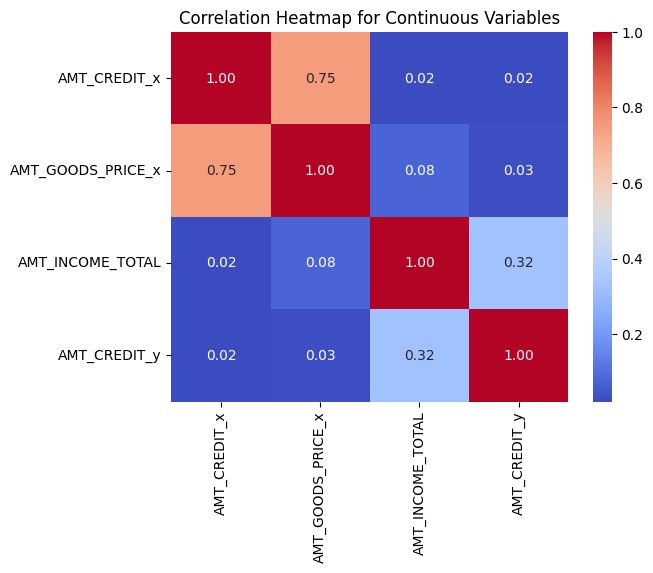

In [215]:
# Calculate correlation matrix
corr = newjoin[continuous_columns].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Continuous Variables')
plt.show()

In [261]:
numerical_columns = newjoin.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY_x', 'AMT_APPLICATION',
       'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x', 'TARGET', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT_y', 'AMT_ANNUITY_y',
       'AMT_GOODS_PRICE_y', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [220]:
categorical_columns = newjoin.select_dtypes(include=['object']).columns
categorical_columns

Index(['NAME_CONTRACT_TYPE_x', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_YIELD_GROUP', 'NAME_CONTRACT_TYPE_y',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

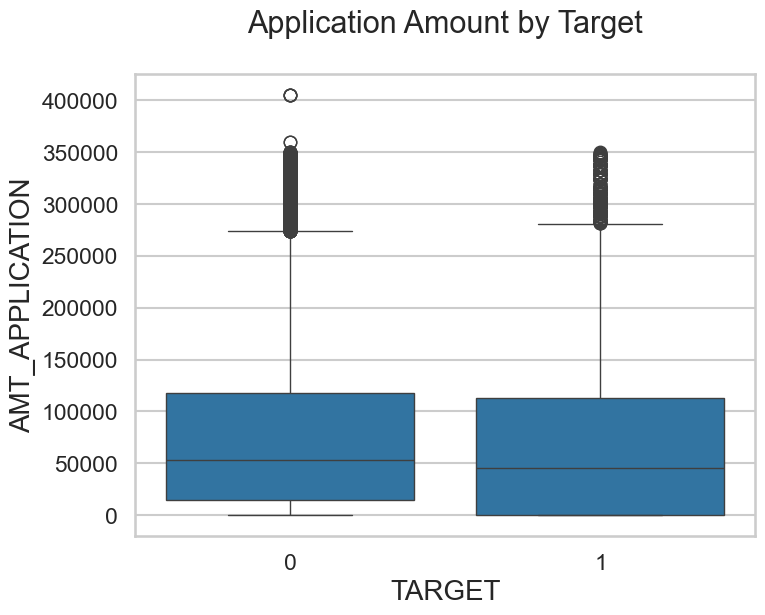

In [301]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='TARGET', y='AMT_APPLICATION', data=newjoin)
plt.title('Application Amount by Target')
plt.show()

In [253]:
target0_df=newjoin.loc[newjoin["TARGET"]==0]
target1_df=newjoin.loc[newjoin["TARGET"]==1]

In [325]:
merging_data_corr = newjoin[['AMT_CREDIT_x', 'AMT_APPLICATION', 'AMT_ANNUITY_x']]
merging_data_corr.head()

,AMT_CREDIT_x,AMT_APPLICATION,AMT_ANNUITY_x
0,17145.0,17145.0,1730.43
7,0.0,0.0,11250.00
8,0.0,0.0,11250.00
21,0.0,0.0,11250.00
22,241920.0,229500.0,22619.52


In [326]:
merging_data_corr.corr()

,AMT_CREDIT_x,AMT_APPLICATION,AMT_ANNUITY_x
AMT_CREDIT_x,1.000000,0.849847,0.584971
AMT_APPLICATION,0.849847,1.000000,0.552502
AMT_ANNUITY_x,0.584971,0.552502,1.000000


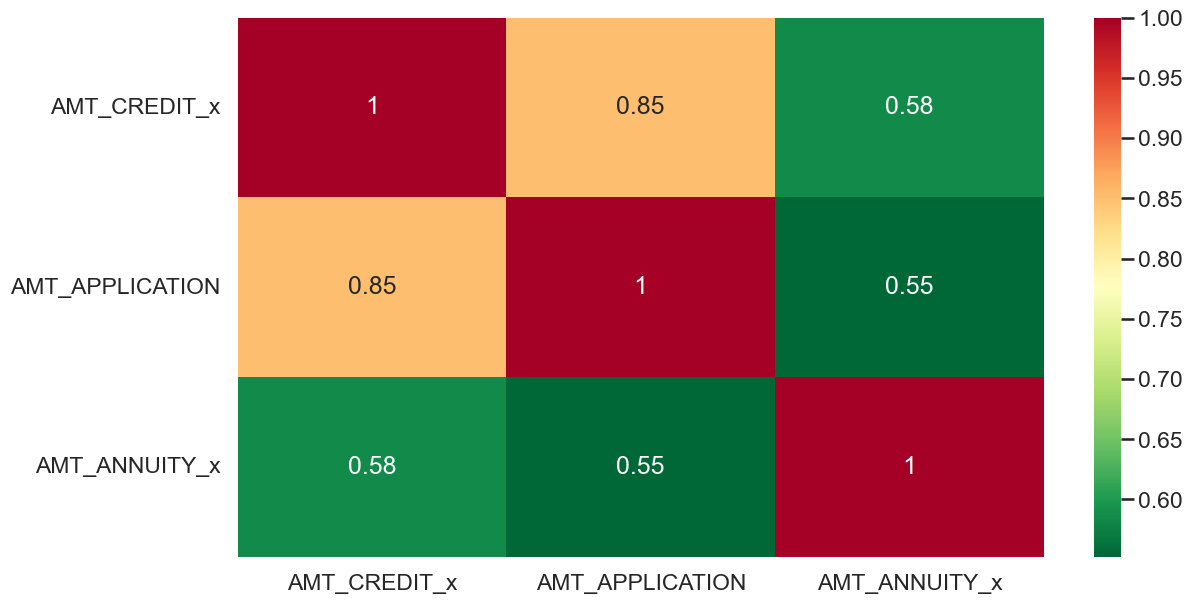

In [327]:
plt.figure(figsize = (13,7))
sns.heatmap(merging_data_corr.corr(), cmap = 'RdYlGn_r', annot = True )
plt.show()

In [ ]:
#CONCLUSION:

#AMT_CREDIT & AMT_APPLICATION : Highly correlated, nearly 99%.
#AMT_CREDIT & AMT_ANNUITY : Highly Correlated, nearly 86%.
#AMT_ANNUITY & AMT_APPLICATION : Highly correlated, nearly 86%

In [329]:
column_lists = ['NAME_CONTRACT_TYPE_x','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']

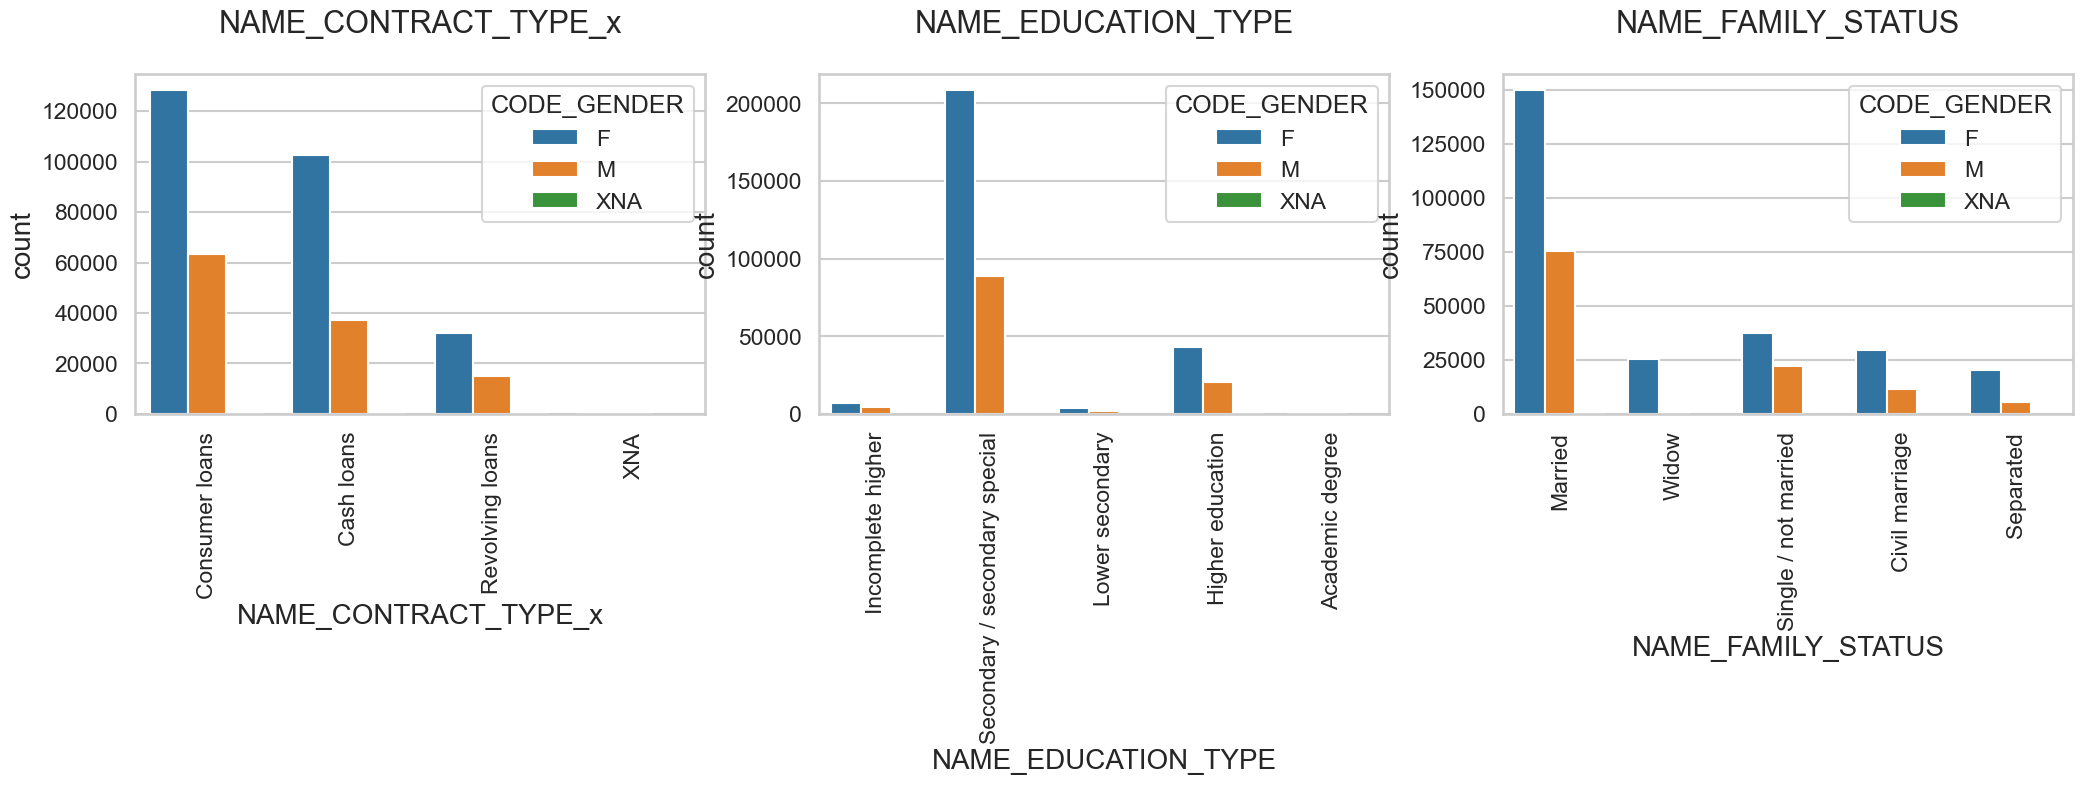

In [331]:
x = 0
plt.figure(figsize = (25,15))
for column in column_lists:
    x += 1
    plt.subplot(3,3,x)
    sns.countplot(x = column,hue = 'CODE_GENDER',data = newjoin)
    plt.xticks(rotation = 90)
    plt.title(column)

In [ ]:
#CONCLUSION:

#Consumer loans are more taken by Female than Male.
#Secondary/Secondary Special Education type of female are more than male.
#More Married female member are taken loans compare to male.

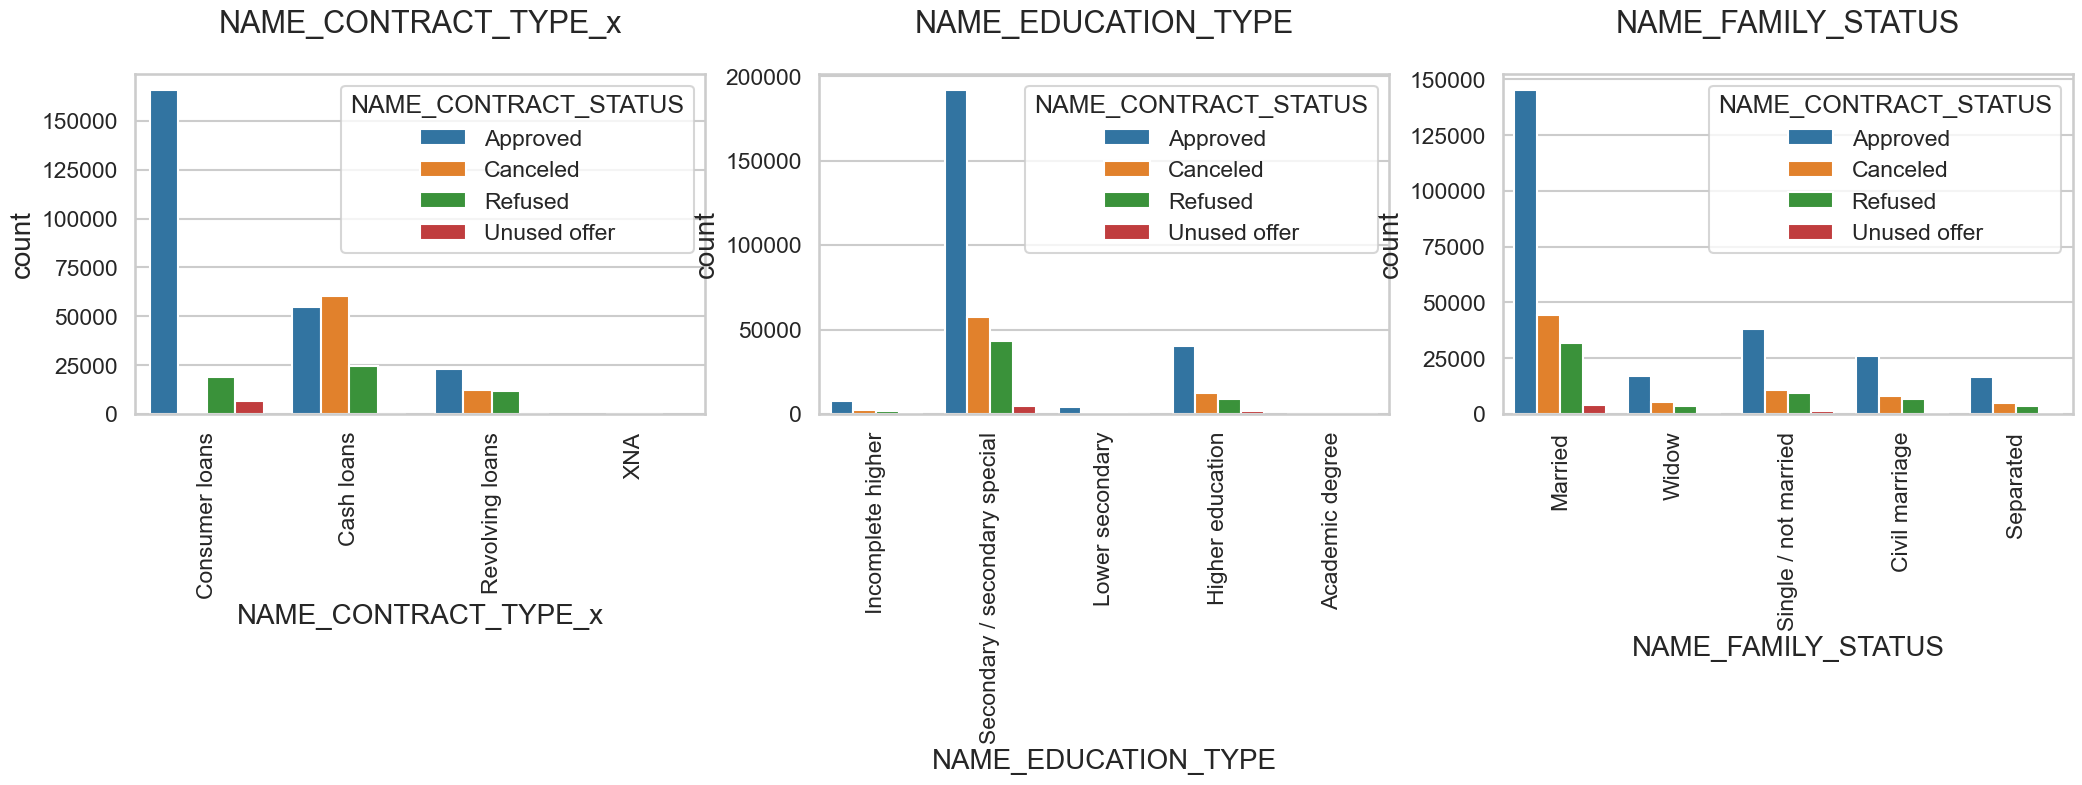

In [333]:
x = 0
plt.figure(figsize = (25,15))
for column in column_lists:
    x += 1
    plt.subplot(3,3,x)
    sns.countplot(x = column,hue = 'NAME_CONTRACT_STATUS',data = newjoin)
    plt.xticks(rotation = 90)
    plt.title(column)

In [ ]:
#CONCLUSION:

#Highest no of contract got approval in consumer Loans.
#Highest no of contract got approval in secondary /secondary special education type.
#Highest no of contract got approved to those who are married.

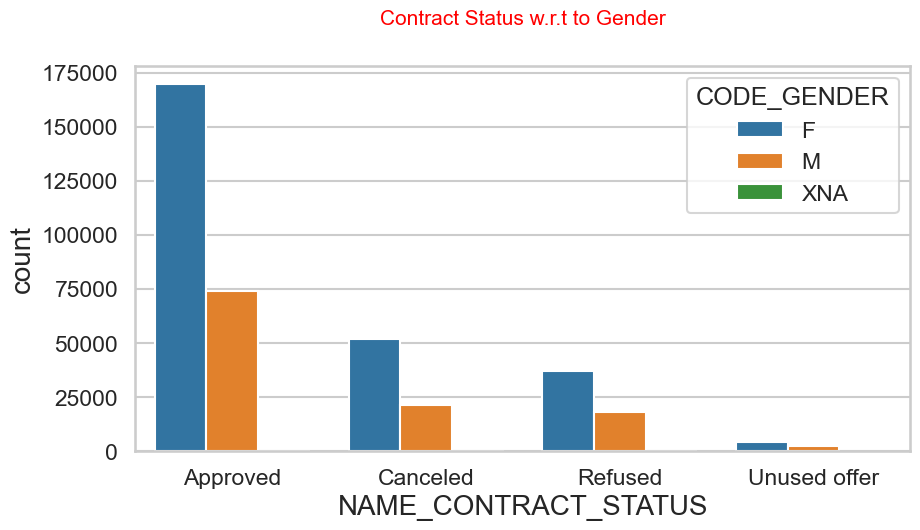

In [334]:
plt.figure(figsize = (10,5))

sns.countplot(x = "NAME_CONTRACT_STATUS", hue = "CODE_GENDER", data = newjoin)
plt.title('Contract Status w.r.t to Gender', color = 'red', fontsize = '15')
plt.show()

In [ ]:
#Summary:

#Female contracts got approved more compared to male.
#Female contracts also got refused more compare to male but that is nearly negligible and Less in numbers compare to approval.

In [336]:
merge_targetvalue_0 = newjoin[(newjoin.TARGET == 0)]
merge_targetvalue_0.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,...,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,2030495,271877,Consumer loans,1730.43,17145.0,17145.0,17145.0,XAP,Approved,Cash through the bank,...,0.683797,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,200000-225000,500000-550000
7,1656711,296299,Cash loans,11250.00,0.0,0.0,112320.0,XNA,Canceled,XNA,...,0.130612,0.619528,0.0,0.0,0.0,0.0,0.0,7.0,150000-175000,550000-600000
8,2367563,342292,Cash loans,11250.00,0.0,0.0,112320.0,XNA,Canceled,XNA,...,0.631585,0.387625,0.0,0.0,0.0,0.0,0.0,5.0,150000-175000,450000-500000
21,1555330,199353,Cash loans,11250.00,0.0,0.0,112320.0,XNA,Canceled,XNA,...,0.573980,0.429424,0.0,0.0,0.0,0.0,0.0,5.0,200000-225000,900000 and above
22,1543131,275707,Cash loans,22619.52,229500.0,241920.0,229500.0,XNA,Approved,Cash through the bank,...,0.365954,0.556727,0.0,0.0,0.0,0.0,0.0,7.0,175000-200000,500000-550000


In [337]:
merge_targetvalue_1 = newjoin[(newjoin.TARGET == 0)]
merge_targetvalue_1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,...,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,2030495,271877,Consumer loans,1730.43,17145.0,17145.0,17145.0,XAP,Approved,Cash through the bank,...,0.683797,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,200000-225000,500000-550000
7,1656711,296299,Cash loans,11250.00,0.0,0.0,112320.0,XNA,Canceled,XNA,...,0.130612,0.619528,0.0,0.0,0.0,0.0,0.0,7.0,150000-175000,550000-600000
8,2367563,342292,Cash loans,11250.00,0.0,0.0,112320.0,XNA,Canceled,XNA,...,0.631585,0.387625,0.0,0.0,0.0,0.0,0.0,5.0,150000-175000,450000-500000
21,1555330,199353,Cash loans,11250.00,0.0,0.0,112320.0,XNA,Canceled,XNA,...,0.573980,0.429424,0.0,0.0,0.0,0.0,0.0,5.0,200000-225000,900000 and above
22,1543131,275707,Cash loans,22619.52,229500.0,241920.0,229500.0,XNA,Approved,Cash through the bank,...,0.365954,0.556727,0.0,0.0,0.0,0.0,0.0,7.0,175000-200000,500000-550000


### DEFAULTERS CORRELATION

In [340]:
cols_list1 = ['AMT_INCOME_TOTAL','AMT_ANNUITY_x', 'AMT_ANNUITY_y', 'NAME_CONTRACT_TYPE_y']

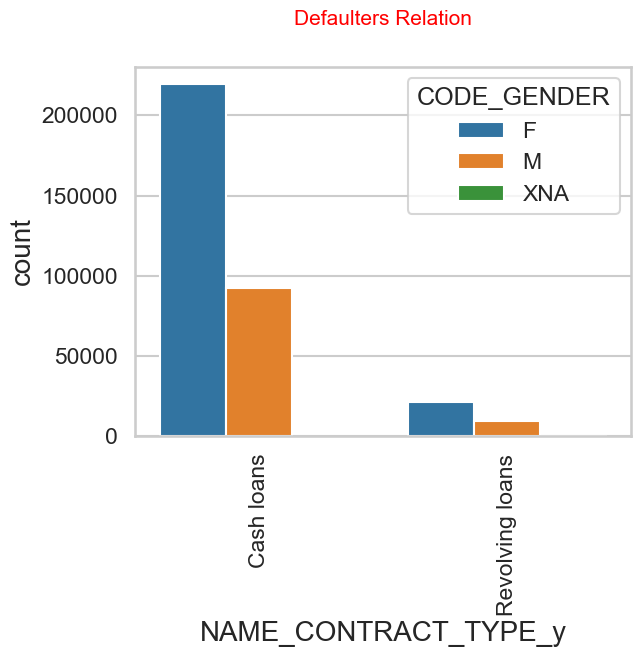

In [345]:
sns.countplot(x = merge_targetvalue_1.NAME_CONTRACT_TYPE_y,hue = merge_targetvalue_1.CODE_GENDER, data = merge_targetvalue_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

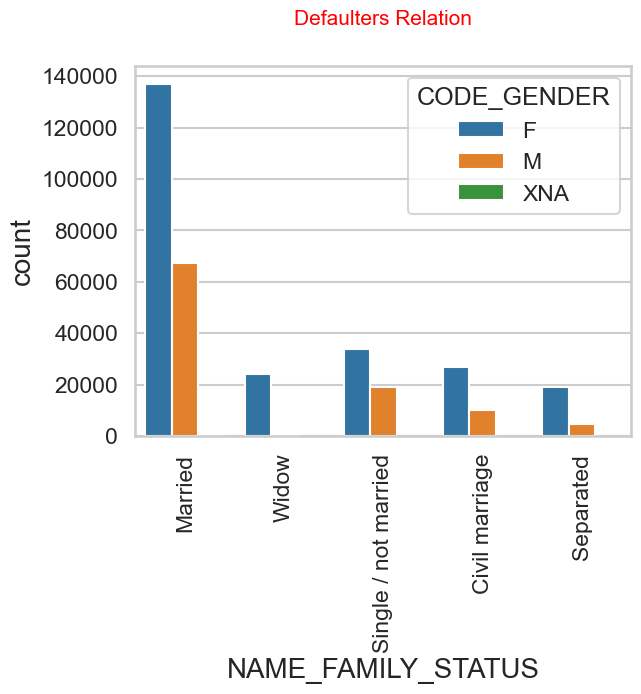

In [346]:
sns.countplot(x = merge_targetvalue_1.NAME_FAMILY_STATUS,hue = merge_targetvalue_1.CODE_GENDER, data = merge_targetvalue_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

### MULTIVARIATE ANALYSIS

In [290]:
crosstab = pd.crosstab(
    [newjoin['CODE_GENDER'], newjoin['NAME_FAMILY_STATUS']],  # Index: Gender and Family Status
    newjoin['TARGET'],                                         # Columns: Target
    values=None,                                                # No aggregation
    aggfunc=None,                                               # Frequency count
    margins=True                                                # Add row and column totals
)
crosstab.rename(columns={0: 'Good Client', 1: 'Defaulter Client', 'All': 'Total'}, inplace=True)

In [291]:
crosstab.rename_axis(['Gender', 'Family Status'], inplace=True)
print(crosstab)

TARGET                       Good Client  Defaulter Client   Total
Gender Family Status                                              
F      Civil marriage              26730              2864   29594
       Married                    136956             12674  149630
       Separated                   18988              1518   20506
       Single / not married        34017              3608   37625
       Widow                       24138              1465   25603
M      Civil marriage               9968              1734   11702
       Married                     67234              8056   75290
       Separated                    4585               780    5365
       Single / not married        18990              3292   22282
       Widow                         823               156     979
XNA    Married                         8                 0       8
All                               342437             36147  378584


In [292]:
multi_df=crosstab.reset_index()
multi_df

TARGET,Gender,Family Status,Good Client,Defaulter Client,Total
0,F,Civil marriage,26730,2864,29594
1,F,Married,136956,12674,149630
2,F,Separated,18988,1518,20506
3,F,Single / not married,34017,3608,37625
4,F,Widow,24138,1465,25603
5,M,Civil marriage,9968,1734,11702
6,M,Married,67234,8056,75290
7,M,Separated,4585,780,5365
8,M,Single / not married,18990,3292,22282
9,M,Widow,823,156,979


In [293]:
multi_df=multi_df.drop(np.where((multi_df.Gender=='All') | (multi_df.Gender=='XNA'))[0],axis=0)

C:\Users\Chinmayee\AppData\Local\Temp\ipykernel_26756\221851581.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender',y='Defaulter Client',hue='Family Status',data=multi_df,ci=None)


<Axes: xlabel='Gender', ylabel='Defaulter Client'>

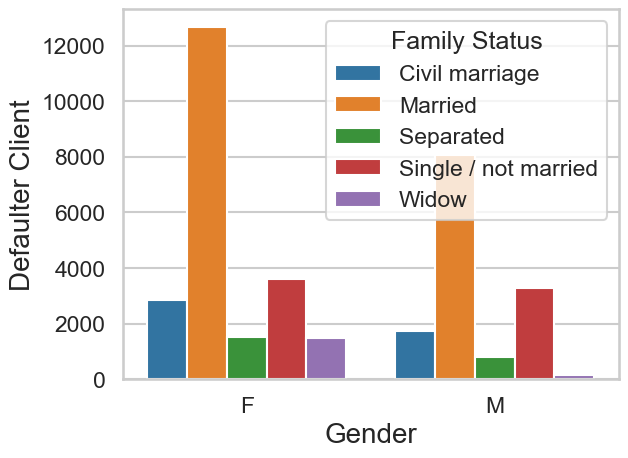

In [294]:
sns.barplot(x='Gender',y='Defaulter Client',hue='Family Status',data=multi_df,ci=None)

In [ ]:
'''Conclusion-Females & Males that are married are more likely to default than others.'''

# CONCLUSION

In [ ]:
'''
1.Married people are struggling to pay the loan bill in comparison to single and separated people.More no of approved people are married. From next time onwards we need to give loan to those who are either single or divorced.
2.Lower credit amount people else really higher credit amount people are having high chance to becoming a defaulters.
3.Female Gender are more likely to not face payment difficulties then the male and hence it is recommended to approve more loans of Female Gender than the male gender at the same Female are High in number than who face difficulties than males.
4.In Contract type, female with consumer loans type are having more no of defaulters.
5.Secondary/ secondary special people with education are struggling to pay their loan bill and becoming defaulters.

'''